<a href="https://colab.research.google.com/github/reireu/for-copy/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 最尤推定

データと計量経済学 5週目

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

先の資料ではコイン投げを例に最尤推定を学んだ。それはベルヌーイ分布に従う離散的な確率変数での最尤推定であった。今回は連続的な確率変数に対して最尤推定を行う。正規分布を仮定し、その平均と分散を最尤推定によって求める。

適当な標本を用意する。

In [ ]:
mu_true = np.random.uniform(3, 5)
sigma_true = np.random.uniform(1, 2)
X = np.random.normal(mu_true, sigma_true, 1000)

真の分布（`np.random.normal`）とそのパラメータ（`mu_true, sigma_true`）確認できるが、これは本来未知なので、知らないフリとする。

改めて、最尤推定の手順は

1. モデル化
2. パラメータ推定

である。

コイン投げの例ではモデル化は簡単だった。表裏の2値だからベルヌーイ分布やな、で終わり。ただ本来はもう少し難しかったりする。特に今回は連続的な確率変数なので、モデル化をより丁寧に行う必要がある。

基本的には、得られた標本の分布を見て適切な分布を仮定する。ヒストグラムを見てみよう。

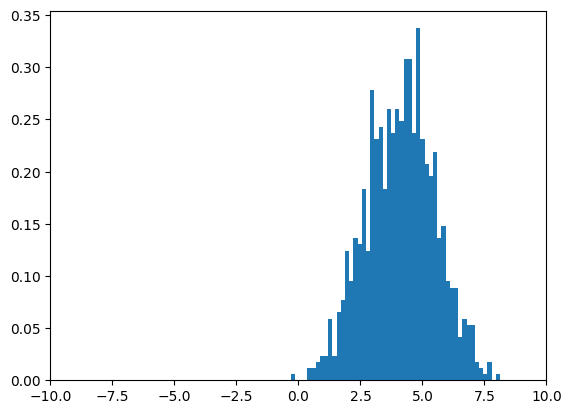

In [ ]:
plt.hist(X, bins=50, density=True)
plt.xlim(-10, 10);

ある地点とその付近が最も多く、そこから離れるにつれて対照的に少なくなっている。このような分布であれば正規分布が仮定できそうだ。今回もそうして、正規分布のパラメータを最尤推定によって求めることにしよう。

では、一旦適当なパラメータを設定して、それがどれくらいこの分布にフィットしているかを見てみよう。

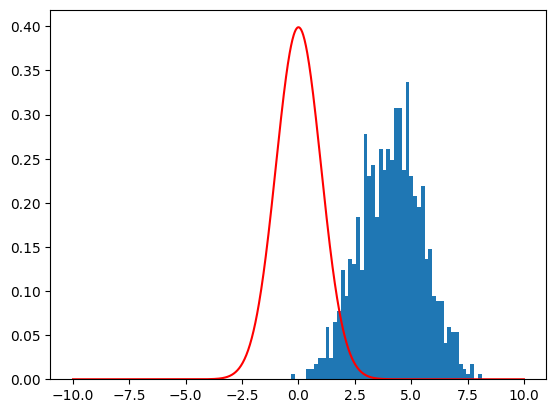

In [ ]:
# 適当なパラメータを設定
mu = 0.
sigma = 1.

x = np.linspace(-10, 10, 1000)
y = sp.stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, color='red')
plt.hist(X, bins=50, density=True);

全然あっていないね。これがいい感じにフィットするように調整する。

まずはこのパラメータの対数尤度を計算してみよう。

### 問1

対数尤度を計算する関数を作成しよう。

- 関数名: `log_likelihood`
- 引数:
    - `mu: float`: 平均
    - `sigma: float`: 標準偏差
- 返り値:
    - `float`: 対数尤度

In [ ]:
mu = 0.
sigma = 1.
x = np.linspace(-10, 10, 1000)
y = sp.stats.norm.pdf(x, mu, sigma)
ll = log_likelihood(mu, sigma)

plt.plot(x, y, color='red')
plt.hist(X, bins=50, density=True)
plt.title(f'log likelihood: {ll:.2f}');

では、パラメータを適当にいじってみよう。現状だと若干左に寄っているので、平均`mu`をいじって右にずらしてみよう。

In [ ]:
mu =

In [ ]:
x = np.linspace(-10, 10, 1000)
y = sp.stats.norm.pdf(x, mu, sigma)
ll = log_likelihood(mu, sigma)

plt.plot(x, y, color='red')
plt.hist(X, bins=50, density=True)
plt.title(f'log likelihood: {ll:.2f}');

対数尤度が増加していたらヨシ。

## 課題

各設問で指定されたファイルとこのノートブック（.ipynb）を提出。

### 課題5-1

平均`mu`を0から10までの間で変化させていく様子を動画で表そう。

- 提出物: 動画ファイル
- `sigma`は固定でいいよ
- その中で最も高い尤度をとった`mu`を保持しておき、真の値`mu_true`と比較しよう

### 課題5-2

分散`sigma`を0.5から5までの間で変化させていく様子を動画で表そう。

- 提出物: 動画ファイル
- `mu`は課題5-1で求めた値を使おう
- その中で最も高い尤度をとった`sigma`を保持しておき、真の値`sigma_true`と比較しよう

### 課題5-3（オプション）

正規分布の最尤推定量を導出しよう。そして、導出した値に基づいて実際に最尤推定量を計算しよう。

- 提出物: 画像かPDF

### 課題5-4（オプション、配点: 0）

俺の授業とか課題どうだった？感想書いて！

## 補足資料

もうちょい厳密に尤度の計算を図にしてみる。

- 参考: [【統計学】尤度って何？をグラフィカルに説明してみる。 #Python - Qiita](https://qiita.com/kenmatsu4/items/b28d1b3b3d291d0cc698)

得られたサンプルをx軸上の点で表示する。

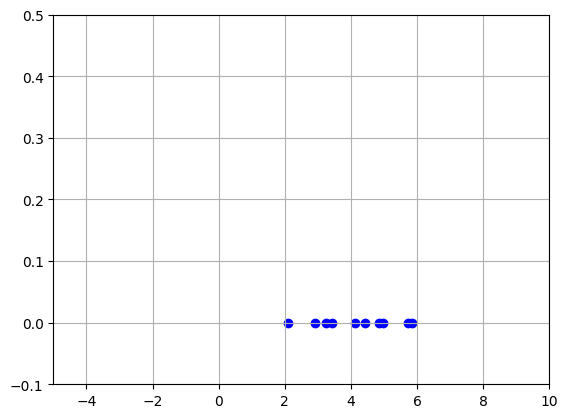

In [ ]:
X = np.random.normal(mu_true, sigma_true, 10)
plt.scatter(X, np.zeros_like(X), color='blue')
plt.xlim(-5, 10)
plt.ylim(-0.1, 0.5)
plt.grid();

適当なパラメータで分布を描画する。

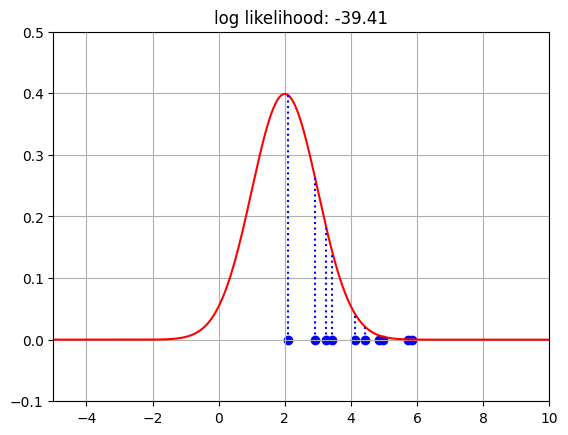

In [ ]:
mu = 2.
sigma = 1.
y = sp.stats.norm.pdf(x, mu, sigma)
d = sp.stats.norm.pdf(X, mu, sigma)
ll = log_likelihood(mu, sigma)

plt.plot(x, y, color='red')
plt.vlines(X, np.zeros_like(X), d, color='blue', linestyles='dotted')
plt.scatter(X, np.zeros_like(X), color='blue')
plt.xlim(-5, 10)
plt.ylim(-0.1, 0.5)
plt.grid()
plt.title(f'log likelihood: {ll:.2f}');

このときの点線の長さが各サンプルにおける確率密度である。つまりこれらの長さの積が尤度になる。最尤推定ではこの積が最大になるようなパラメータ、つまり点線が全体的に長くなるようなパラメータを探す。

実際に真の値を入れてみると

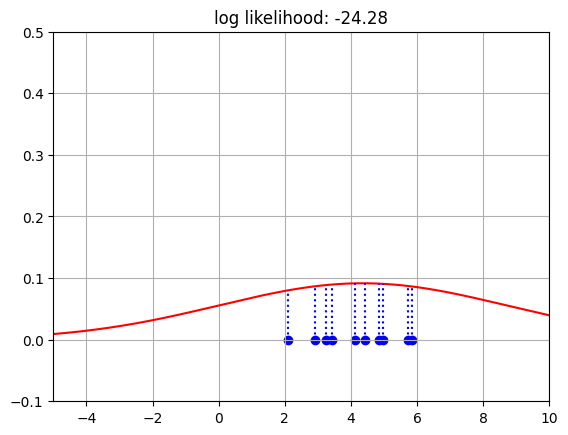

In [ ]:
mu = mu_true
sigma = mu_true
y = sp.stats.norm.pdf(x, mu, sigma)
d = sp.stats.norm.pdf(X, mu, sigma)
ll = log_likelihood(mu, sigma)

plt.plot(x, y, color='red')
plt.vlines(X, np.zeros_like(X), d, color='blue', linestyles='dotted')
plt.scatter(X, np.zeros_like(X), color='blue')
plt.xlim(-5, 10)
plt.ylim(-0.1, 0.5)
plt.grid()
plt.title(f'log likelihood: {ll:.2f}');

全体がある程度の長さを持つようになった。実際に対数尤度は先ほどよりも大きくなった。